In [5]:
import numpy as np
import pandas as pd
import graphviz
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from pylab import rcParams
rcParams['figure.figsize'] = 10,8

# 1. A simple example of regression using decision trees

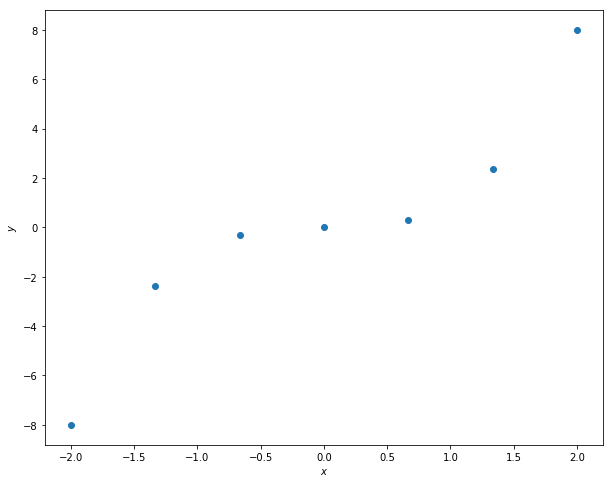

In [6]:
X = np.linspace(-2,2, 7)
y = X**3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

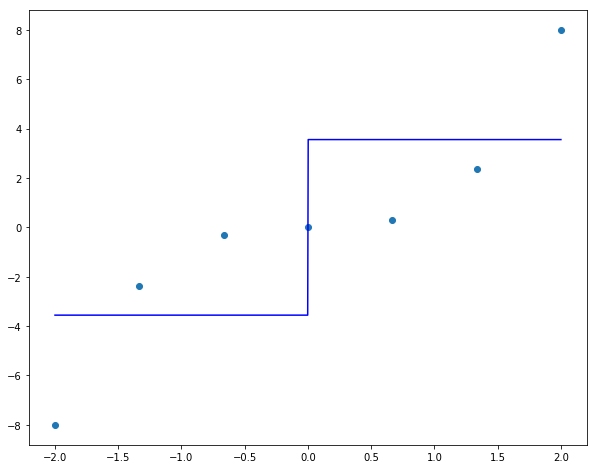

In [7]:
z = np.linspace(-2, 2, 1000)

a2 = np.mean(y[X < 0])
predictions = [a2 if x < 0 else -a2 for x in z]

plt.scatter(X, y);
plt.plot(z, predictions, 'b');

In [8]:
def regression_var_criterion(X, y, t):
    D = 1/len(X)*np.sum((np.round(y,5)-\
                           1/len(X)*np.sum(np.round(y,5)))**2)
    Xl = []
    Xr = []
    yr = []
    yl = []
    for i in range(len(X)):
        if X[i] < t:
            Xl.append(X[i])
            yl.append(y[i])
        else:
            Xr.append(X[i])
            yr.append(y[i])
    yr = np.array(yr)
    yl = np.array(yl)
    D_Xl = 1/len(Xl)*np.sum((np.round(yl,5)-\
                                 1/len(Xl)*np.sum(np.round(yl,5)))**2)
    D_Xr = 1/len(Xr)*np.sum((np.round(yr,5)-\
                                 1/len(Xr)*np.sum(np.round(yr,5)))**2)
    Q = D - len(Xl)/len(X)*D_Xl - len(Xr)/len(X)*D_Xr
    
    return Q

t = np.linspace(-1.9,1.9,7)
Q1 = []
for i in range(len(t)):
    Q1.append(regression_var_criterion(X, y, t[i]))

for i in range(len(Q1)):
    print('X <',t[i])
    print('Q = ',Q1[i],'\n')

X < -1.9
Q =  10.666666666666664 

X < -1.2666666666666666
Q =  10.754457393689997 

X < -0.6333333333333333
Q =  9.481487407408334 

X < 0.0
Q =  9.481487407408334 

X < 0.6333333333333333
Q =  9.481487407408334 

X < 1.2666666666666666
Q =  10.754457393689997 

X < 1.9
Q =  10.666666666666664 



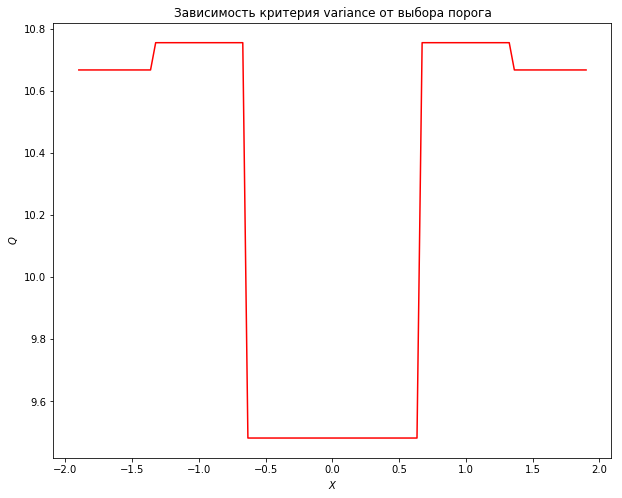

In [9]:
t = np.linspace(-1.9,1.9,100)
Q1 = []
for i in range(len(t)):
    Q1.append(regression_var_criterion(X, y, t[i]))
Q1 = np.array(Q1)    
plt.plot(t, Q1 , 'r');
plt.xlabel(r'$X$')
plt.ylabel(r'$Q$');
plt.title('Зависимость критерия variance от выбора порога');

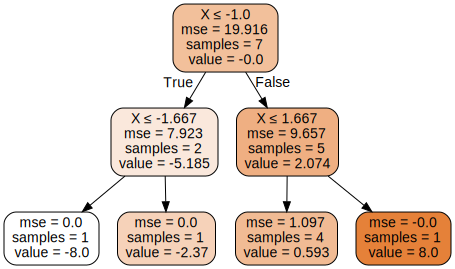

In [18]:
dot_data = export_graphviz(tree, feature_names='X',out_file=None,\
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Question 1. Is the threshold value t=0 optimal according to the variance criterion?
### Answer(1) : No

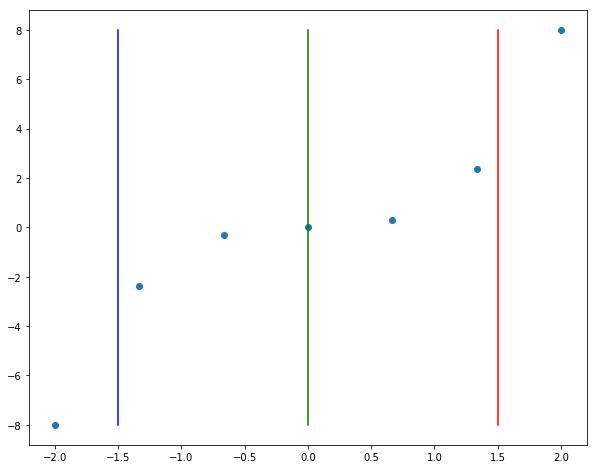

In [12]:
z1 = np.linspace(0,0,7)
l = np.linspace(1.5,1.5,7)
r = np.linspace(-1.5,-1.5,7)
plt.scatter(X, y)
plt.plot(z1, y, "g");
plt.plot(l, y, "r");
plt.plot(r, y, "b");

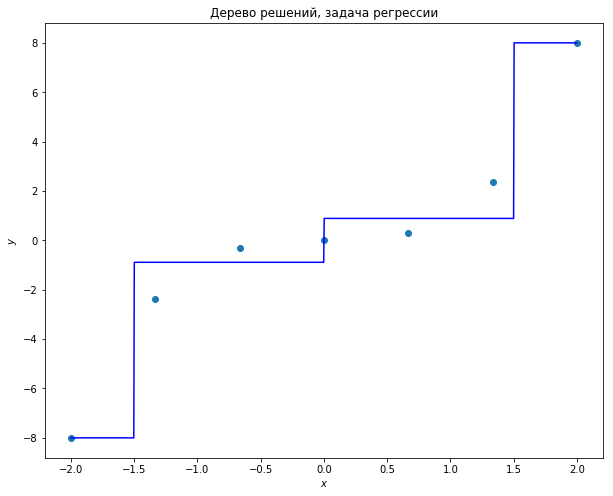

In [13]:
z = np.linspace(-2, 2, 1000)

a3 = np.mean(y[X >= 1.5])
a4 = np.mean(y[(X >= 0) & (X < 1.5)])
predictions = np.array([a3 if x >= 1.5 else a4 if x >=0 else
               -a4 if x >=-1.5 else -a3 for x in z])

plt.scatter(X, y);
plt.plot(z, predictions, 'b');
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');
plt.title('Дерево решений, задача регрессии');


### Question 2. How many segments are there on the plot of tree predictions in the interval [-2, 2] (it is necessary to count only horizontal lines)?
### Answer(2): 4

# 2. Building a decision tree for predicting heart diseases

In [14]:
tree = DecisionTreeRegressor(max_depth=2, random_state=17)

In [17]:
X1 = X.reshape(-1, 1)
y1 = y.reshape(-1, 1)
tree.fit(X1, y1)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=17, splitter='best')

In [19]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 20)

In [20]:
df = pd.read_csv('../data/mlbootcamp5_train.csv', 
                 index_col='id', sep=';')
df['age_in_years'] = df['age']//365
chole = pd.get_dummies(df['cholesterol'],prefix='chole')
gluc = pd.get_dummies(df['gluc'],prefix='gluc')

## One Hot Encoding (OHE) - Фиктивная кодировка

In [28]:
data = pd.concat([df, chole, gluc], axis=1).drop(columns = ['cholesterol','gluc'])
data.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age_in_years,chole_1,chole_2,chole_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,1,0,50,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,0,0,1,1,55,0,0,1,1,0,0
2,18857,1,165,64.0,130,70,0,0,0,1,51,0,0,1,1,0,0
3,17623,2,169,82.0,150,100,0,0,1,1,48,1,0,0,1,0,0
4,17474,1,156,56.0,100,60,0,0,0,0,47,1,0,0,1,0,0


In [29]:
y = data['cardio']
data1 = data.drop('cardio', axis=1)

In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(data1, y, test_size=0.3,random_state=17)

In [31]:
clf_tree = DecisionTreeClassifier(max_depth=3, random_state=17)

In [32]:
clf_tree.fit(X_train, y_train);

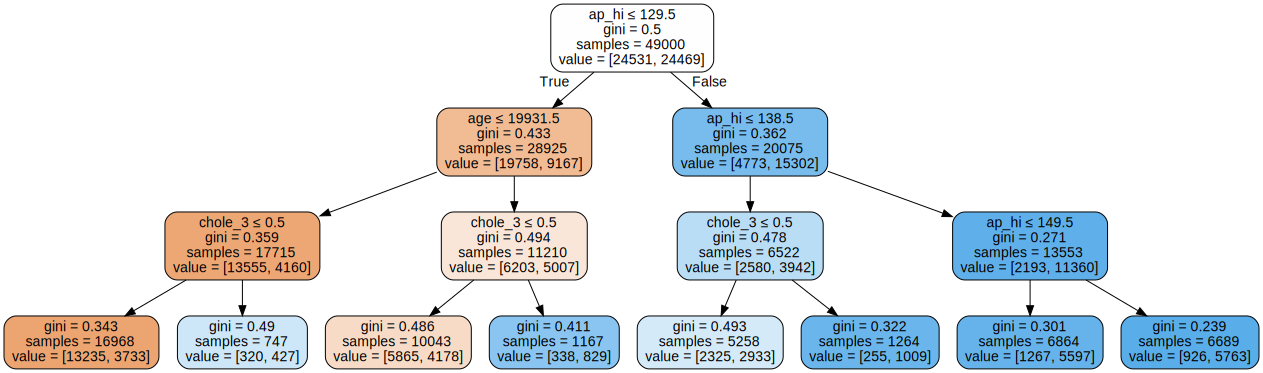

In [33]:
dot_clf_tree = export_graphviz(clf_tree, feature_names=data1.columns,\
                            out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_clf_tree)
graph

### Question 3. What 3 features are used to make predictions in the created decision tree?
### Answer(3): age, ap_hi, chol=3

#### 1.Train the decision tree on the dataset (X_train, y_train) with max depth equals to 3 and random_state=17

In [34]:
X_train, X_valid, y_train, y_valid = train_test_split(data1, y, test_size=0.3,random_state=17)
tree = DecisionTreeClassifier(max_depth=3, random_state=17)
tree.fit(X_train, y_train);

#### 2.Make predictions for holdout data (X_valid, y_valid) with the trained decision tree. Calculate accuracy.

In [35]:
tree_pred = tree.predict(X_valid)
acc1 = accuracy_score(y_valid, tree_pred)
acc1

0.7212857142857143

#### 3.Set up the depth of the tree using cross-validation on the dataset (X_train, y_train) in order to increase quality of the model.

In [36]:
tree_params = {'max_depth': [2,3,4,5,6,7,8,9,10]}
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1,
verbose=True)
tree_grid.fit(X_train, y_train);

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.9s finished


#### 4.Draw the plot to show how mean accuracy is changing in regards to max_depth value on cross-validation.

In [37]:
tree_grid.cv_results_;

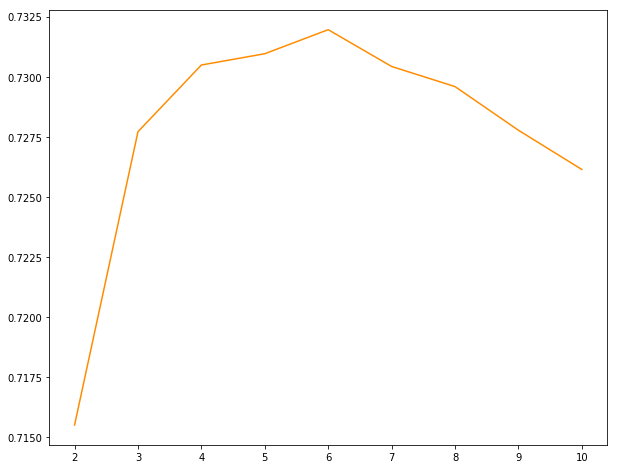

In [38]:
max_depth = np.array(list(range(2,11)))
train_scores, test_scores = validation_curve(
    tree, X_train, y_train, param_name="max_depth", param_range=max_depth,
    cv=5, scoring="accuracy", n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
lw = 2
plt.plot( max_depth, test_scores_mean, label="Test score",
             color="darkorange");

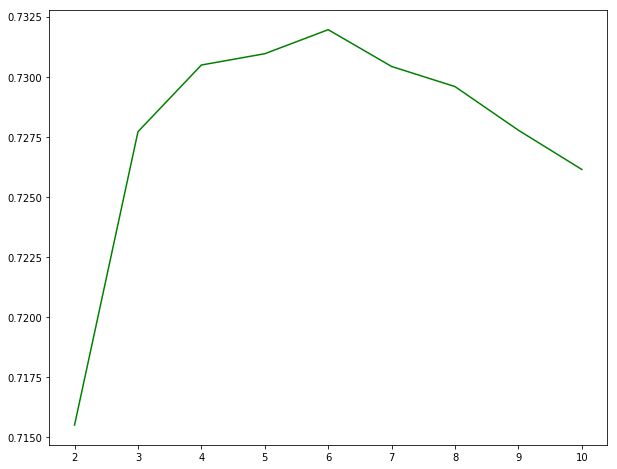

In [39]:
plt.plot(tree_params['max_depth'], 
         tree_grid.cv_results_['mean_test_score'], 'g', label ='accuracy');

#### 5.Print the best value of max_depth where the mean value of cross-validation quality metric reachs maximum.

In [40]:
tree_grid.best_params_

{'max_depth': 6}

In [41]:
best_tree = tree_grid.best_estimator_

#### 6.Compute accuracy on holdout data.

#### При max_depth=6 (от .best_estimator_)

In [42]:
best_tree.fit(X_train, y_train)
best_pred = best_tree.predict(X_valid)
acc3 = accuracy_score(y_valid, best_pred)
acc3

0.7258095238095238

#### При max_depth=6 (от GridSearchCV(tree, tree_params, cv=5, n_jobs=-1,verbose=True))

In [43]:
acc2 = accuracy_score(y_valid, tree_grid.predict(X_valid))
acc2

0.7258095238095238

In [44]:
(acc2-acc1)/acc1* 100

0.6271869016967002

### Question 4. Is there a local maximum of accuracy on the built validation curve? Did GridSearchCV help to tune max_depth so that there's been at least 1% change in holdout accuracy? 
### Answer(4): Yes, No

In [45]:
1 - np.mean(y)

0.5003

In [46]:
data['age_in_years_1'] = ((data['age_in_years'] >=40)&(data['age_in_years'] <50)).astype(int)
data['age_in_years_2'] = ((data['age_in_years'] >=50)&(data['age_in_years'] <55)).astype(int)
data['age_in_years_3'] = ((data['age_in_years'] >=55)&(data['age_in_years'] <60)).astype(int)
data['age_in_years_4'] = ((data['age_in_years'] >=60)&(data['age_in_years'] <65)).astype(int)

In [49]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age_in_years,chole_1,chole_2,chole_3,gluc_1,gluc_2,gluc_3,age_in_years_1,age_in_years_2,age_in_years_3,age_in_years_4
id,,,,,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,1,0,50,1,0,0,1,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,0,0,1,1,55,0,0,1,1,0,0,0,0,1,0
2,18857,1,165,64.0,130,70,0,0,0,1,51,0,0,1,1,0,0,0,1,0,0
3,17623,2,169,82.0,150,100,0,0,1,1,48,1,0,0,1,0,0,1,0,0,0
4,17474,1,156,56.0,100,60,0,0,0,0,47,1,0,0,1,0,0,1,0,0,0


In [12]:
#systolic blood pressure: ap_hi∈[120,140),ap_hi∈[140,160),ap_hi∈[160,180), (3 features)

In [50]:
data['ap_hi_1'] = ((data['ap_hi'] >=120)&(data['ap_hi'] <140)).astype(int)
data['ap_hi_2'] = ((data['ap_hi'] >=140)&(data['ap_hi'] <160)).astype(int)
data['ap_hi_3'] = ((data['ap_hi'] >=160)&(data['ap_hi'] <180)).astype(int)

In [52]:
data.drop('ap_hi',axis=1, inplace=True)

In [53]:
data.rename(columns={'gender': 'male'}, inplace=True)

In [55]:
data['male'] = data['male'].map({1:0,2:1})

In [60]:
data_tree = data.drop(columns=['age','height','weight','ap_lo','alco',\
                                 'active','age_in_years','gluc_1','gluc_2','gluc_3'])

In [62]:
X = data_tree.drop('cardio',axis=1)

In [74]:
X.head()

,male,smoke,chole_1,chole_2,chole_3,age_in_years_1,age_in_years_2,age_in_years_3,age_in_years_4,ap_hi_1,ap_hi_2,ap_hi_3
id,,,,,,,,,,,,
0,1,0,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,1,0
2,0,0,0,0,1,0,1,0,0,1,0,0
3,1,0,1,0,0,1,0,0,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,0,0


In [64]:
treee = DecisionTreeClassifier(max_depth=3, random_state=17)

In [65]:
treee.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

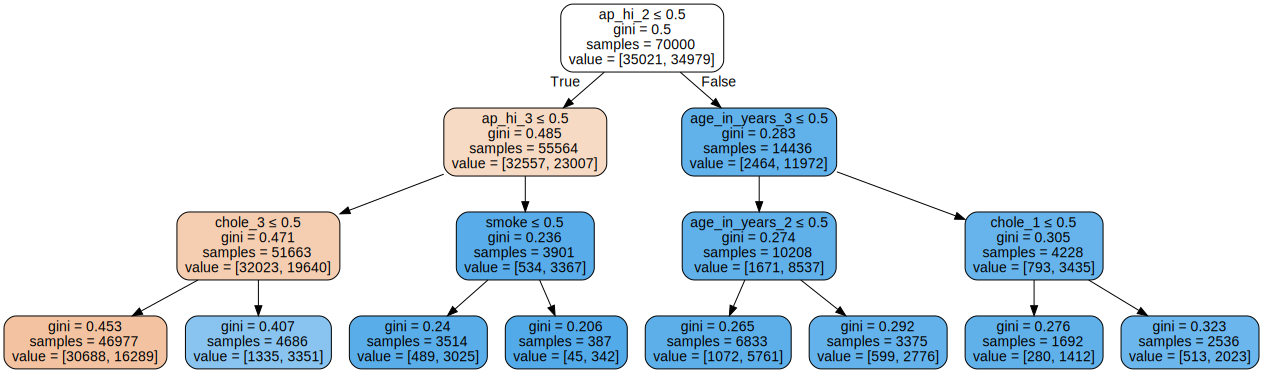

In [66]:
dot_clf_treee = export_graphviz(treee, feature_names=X.columns,\
                            out_file=None, filled=True, rounded=True, special_characters=True)
graph1 = graphviz.Source(dot_clf_treee)
graph1

### Question 5. What binary feature is the most important for heart disease detection (it is placed in the root of the tree)?
### Answer(5): Systolic blood pressure from 140 to 160 (mmHg)